In [2]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('cotton(lint)2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['NPK']+dataset['MOP'])/2

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,5000,745.3,649,400.000000,0.73
1,4000,745.3,649,750.000000,0.73
2,2000,745.3,649,1500.000000,0.73
3,2000,745.3,649,1000.000000,0.73
4,2000,745.3,649,1500.000000,0.73
...,...,...,...,...,...
1248,168,653.3,494,363.095238,0.67
1249,260,653.3,494,396.153846,0.67
1250,581,653.3,494,407.917384,0.67
1251,756,653.3,494,345.238095,0.67


In [5]:
dataset['Labour_hours'].value_counts()

833.3    670
653.3    397
745.3    186
Name: Labour_hours, dtype: int64

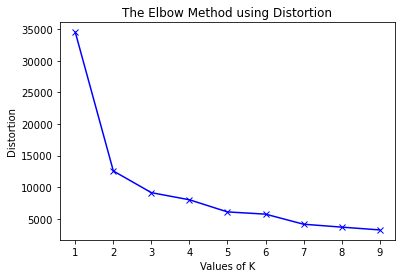

In [6]:
X=dataset.values
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

[[-0.41024943 -0.222061   -0.02377064 -0.91778919  0.19847299]
 [-0.43016295 -0.222061   -0.02377064 -0.64879509  0.19847299]
 [-0.46999    -0.222061   -0.02377064 -0.07237915  0.19847299]
 ...
 [-0.49824729 -1.36300876 -0.7120985  -0.91170425 -0.15191328]
 [-0.49476243 -1.36300876 -0.7120985  -0.9598767  -0.15191328]
 [-0.49044119 -1.36300876 -0.7120985  -0.89188108 -0.15191328]]


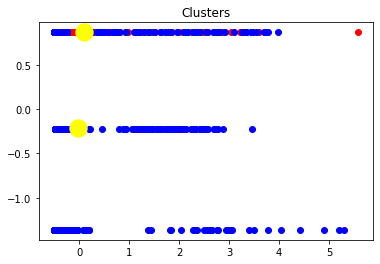

In [7]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [8]:
dataset
dataset['Cluster'].value_counts()

1    1008
0     245
Name: Cluster, dtype: int64

In [9]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)




In [10]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)


In [11]:
print(cluster0.max()) 
print(cluster0.min())

print(cluster1.max()) 
print(cluster1.min())



Area            306058.000000
Labour_hours       833.300000
Rainfall          1094.000000
Yield             5227.272727
fertilizer           1.000000
dtype: float64
Area               2.0
Labour_hours     833.3
Rainfall        1094.0
Yield            162.5
fertilizer         1.0
dtype: float64
Area            291897.000000
Labour_hours       833.300000
Rainfall           649.000000
Yield             7067.137809
fertilizer           0.730000
dtype: float64
Area              1.00
Labour_hours    653.30
Rainfall        494.00
Yield             0.00
fertilizer        0.46
dtype: float64


In [19]:
bin_area = [-1,5000,30000,310000]
bin_labour = [600,700,800,900]
bin_rainfall = [400,500,700,1100]
bin_yield= [-1,2000,4000,7000]
bin_fertilizer=[0,0.6,0.7,1]

In [21]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 5000]_a','(5000, 30000]_a','(30000, 310000]_a','(600, 700]_l','(700, 800]_l','(800, 900]_l','(400, 500]_r','(500, 700]_r','(800, 1100]_r','(-1, 2000]_y','(2000, 4000]_y','(4000, 7000]_y','(0.0, 0.6]_fert','(0.6, 0.7]_fert','(0.7, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.4, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('cotton_rules1.csv')
rules

(-1, 5000]         89
(5000, 30000]      88
(30000, 310000]    68
Name: range_area, dtype: int64
(-1, 2000]      122
(2000, 4000]    117
(4000, 7000]      6
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((800, 900]_l)","((800, 1100]_r)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
1,"((800, 1100]_r)","((800, 900]_l)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
3,"((-1, 2000]_y)","((800, 900]_l)",0.497959,1.000000,0.497959,1.000000,1.0,0.0,inf
4,"((2000, 4000]_y)","((800, 900]_l)",0.477551,1.000000,0.477551,1.000000,1.0,0.0,inf
6,"((800, 900]_l)","((0.7, 1.0]_fert)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
82,"((800, 900]_l, (0.7, 1.0]_fert)","((2000, 4000]_y, (800, 1100]_r)",1.000000,0.477551,0.477551,0.477551,1.0,0.0,1.0
83,"((800, 1100]_r, (0.7, 1.0]_fert)","((2000, 4000]_y, (800, 900]_l)",1.000000,0.477551,0.477551,0.477551,1.0,0.0,1.0
85,"((800, 900]_l)","((2000, 4000]_y, (800, 1100]_r, (0.7, 1.0]_fert)",1.000000,0.477551,0.477551,0.477551,1.0,0.0,1.0
86,"((800, 1100]_r)","((2000, 4000]_y, (800, 900]_l, (0.7, 1.0]_fert)",1.000000,0.477551,0.477551,0.477551,1.0,0.0,1.0


In [24]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
#merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']
merged.columns=['(-1, 5000]_a','(5000, 30000]_a','(30000, 310000]_a','(600, 700]_l','(700, 800]_l','(800, 900]_l','(400, 500]_r','(500, 700]_r','(800, 1100]_r','(-1, 2000]_y','(2000, 4000]_y','(4000, 7000]_y','(0.0, 0.6]_fert','(0.6, 0.7]_fert','(0.7, 1.0]_fert']
merged


frq_items = apriori(merged, min_support = 0.3, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('cotton_rules2.csv')
rules

(-1, 5000]         647
(30000, 310000]    186
(5000, 30000]      175
Name: range_area, dtype: int64
(-1, 2000]      723
(2000, 4000]    224
(4000, 7000]     60
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"((600, 700]_l)","((0.6, 0.7]_fert)",0.393849,0.393849,0.393849,1.000000,2.539043,0.238732,inf
13,"((0.6, 0.7]_fert)","((600, 700]_l)",0.393849,0.393849,0.393849,1.000000,2.539043,0.238732,inf
45,"((600, 700]_l, (400, 500]_r)","((0.6, 0.7]_fert)",0.393849,0.393849,0.393849,1.000000,2.539043,0.238732,inf
46,"((0.6, 0.7]_fert, (400, 500]_r)","((600, 700]_l)",0.393849,0.393849,0.393849,1.000000,2.539043,0.238732,inf
47,"((600, 700]_l)","((0.6, 0.7]_fert, (400, 500]_r)",0.393849,0.393849,0.393849,1.000000,2.539043,0.238732,inf
...,...,...,...,...,...,...,...,...,...
6,"((-1, 5000]_a)","((0.0, 0.6]_fert)",0.641865,0.421627,0.316468,0.493045,1.169386,0.045841,1.140876
29,"((-1, 5000]_a)","((0.0, 0.6]_fert, (800, 900]_l)",0.641865,0.421627,0.316468,0.493045,1.169386,0.045841,1.140876
15,"((-1, 2000]_y)","((800, 900]_l)",0.717262,0.421627,0.310516,0.432918,1.026781,0.008099,1.019911
23,"((-1, 2000]_y)","((0.0, 0.6]_fert)",0.717262,0.421627,0.310516,0.432918,1.026781,0.008099,1.019911


In [64]:
category = pd.cut(cluster2.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster2,category],axis = 1)
df_new
category = pd.cut(cluster2.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster2.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.6, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('onion_rules3.csv')
rules

(-1, 100]       1
(500, 25000]    0
(100, 500]      0
Name: range_area, dtype: int64
(30000, 2250000]    1
(12000, 30000]      0
(-1, 12000]         0
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((-1, 100]_a)","((300, 500]_l)",1.0,1.0,1.0,1.0,1.0,0.0,inf
1,"((300, 500]_l)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
2,"((-1, 100]_a)","((500, 800]_r)",1.0,1.0,1.0,1.0,1.0,0.0,inf
3,"((500, 800]_r)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
4,"((30000, 2250000]_y)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
175,"((-1, 100]_a)","((30000, 2250000]_y, (500, 800]_r, (300, 500]_...",1.0,1.0,1.0,1.0,1.0,0.0,inf
176,"((500, 800]_r)","((30000, 2250000]_y, (-1, 100]_a, (300, 500]_l...",1.0,1.0,1.0,1.0,1.0,0.0,inf
177,"((300, 500]_l)","((30000, 2250000]_y, (-1, 100]_a, (500, 800]_r...",1.0,1.0,1.0,1.0,1.0,0.0,inf
178,"((30000, 2250000]_y)","((-1, 100]_a, (500, 800]_r, (300, 500]_l, (0.6...",1.0,1.0,1.0,1.0,1.0,0.0,inf
